In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata

In [3]:
data_mot = pd.DataFrame(cbsodata.get_data('84709ENG')) # insert dataset with modes of travel data

In [5]:
data_mot.set_index('ID', inplace=True) # set ID as index
data_mot.head()

,Population,Sex,PersonalCharacteristics,ModesOfTravel,Margins,RegionCharacteristics,Periods,Trips_1,DistanceTravelled_2,TimeTravelled_3,Trips_4,DistanceTravelled_5,TimeTravelled_6
ID,,,,,,,,,,,,,
0,Population 6 years or older,Total male and female,Total persons,Total,Value,The Netherlands,2018,2.78,36.16,74.60,1015.0,13200.0,453.8
1,Population 6 years or older,Total male and female,Total persons,Total,Value,The Netherlands,2019,2.71,36.00,74.39,989.0,13140.0,452.6
2,Population 6 years or older,Total male and female,Total persons,Total,Value,The Netherlands,2020,2.35,24.88,61.96,861.0,9105.0,378.0
3,Population 6 years or older,Total male and female,Total persons,Total,Value,The Netherlands,2021,2.51,27.24,69.85,915.0,9942.0,424.9
4,Population 6 years or older,Total male and female,Total persons,Total,Value,Noord-Nederland (LD),2018,2.77,40.99,74.28,1011.0,14962.0,451.9


In [6]:
# selecting needed columns
data_mot = data_mot[['PersonalCharacteristics', 'ModesOfTravel','DistanceTravelled_2']]
data_mot

,PersonalCharacteristics,ModesOfTravel,DistanceTravelled_2
ID,,,
0,Total persons,Total,36.16
1,Total persons,Total,36.00
2,Total persons,Total,24.88
3,Total persons,Total,27.24
4,Total persons,Total,40.99
...,...,...,...
443515,No driver's license; under 17,Other,NaN
443516,No driver's license; under 17,Other,NaN
443517,No driver's license; under 17,Other,NaN


In [7]:
# rename columns
data_mot.columns = ['Personal characteristics','Modes of travel','Distance travelled']

# selecting rows based on conditions
options_ovchipcard = ['Students with week pass publ. transp.',
                    'Persons without student publ.transp.card'] 
options_travelmode = ['Passenger car (driver)','Train']
rslt_data_mot = data_mot[data_mot['Personal characteristics'].isin(options_ovchipcard) &
                    data_mot['Modes of travel'].isin(options_travelmode)] 


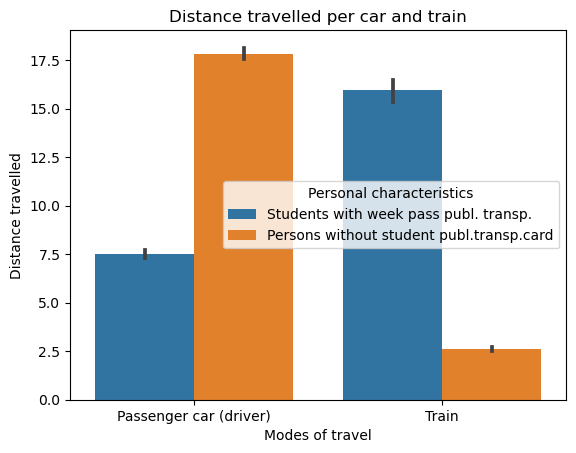

In [8]:
# making barplot
student_ov_plot = sns.barplot(x='Modes of travel', y='Distance travelled', data=rslt_data_mot, hue ='Personal characteristics')
plt.title(f'Distance travelled per car and train')
student_ov_plot.figure.savefig(f'C:/Users/josep/Documents/Documenten-Josephine/Studeren/TU Delft/Transport, Infrastructure and Logistics/Q1 Y1/TIL Python programming/TIL6022-LabAssignments-group-11/Project/student_ov.png')
plt.show()


As you can see in the barplot, the distance travelled with train by students with a week pass is seven times as big as by people without a student ov chipcard. This makes sense because the train costs more money with a normal ov chipcard. Although students with a week pass still use the car quite a lot: 7,5 kilometers a day on average. 

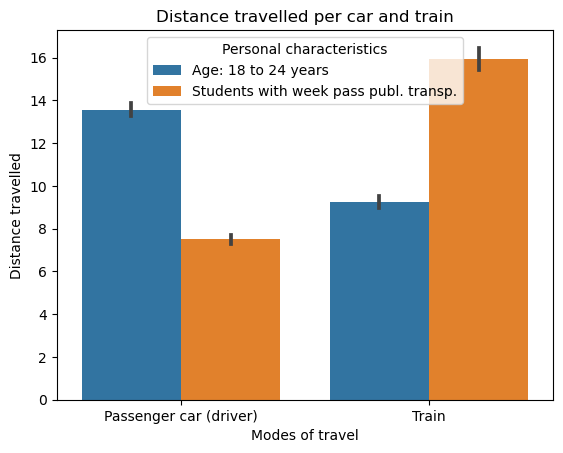

In [16]:
# selecting rows based on conditions
options_pc = ['Students with week pass publ. transp.',
                "Age: 18 to 24 years"] 
options_travelmode = ['Passenger car (driver)','Train']
rslt_data_mot = data_mot[data_mot['Personal characteristics'].isin(options_pc) &
                    data_mot['Modes of travel'].isin(options_travelmode)] 

# making barplot
student_ov_age_plot = sns.barplot(x='Modes of travel', y='Distance travelled', data=rslt_data_mot, hue ='Personal characteristics')
plt.title(f'Distance travelled per car and train')
# student_ov_plot.figure.savefig(f'C:/Users/josep/Documents/Documenten-Josephine/Studeren/TU Delft/Transport, Infrastructure and Logistics/Q1 Y1/TIL Python programming/TIL6022-LabAssignments-group-11/Project/student_ov.png')
plt.show()

In this plot it is visible that people in the age 18 to 24 years travel greater distances with the car than with the train. The opposite of students with a student ov chipcard, which are mainly in the same age category. But a big part of this age category is already working because they finish their education young. They probably have more money to spend so they travel with car and they can't have a student ov chipcard.